In [2]:
from sktime.utils.load_data import load_from_tsfile_to_dataframe
from sktime.transformers.shapelets import ContractedRandomShapeletTransform

dataset = "GunPoint"
train_x, train_y = load_from_tsfile_to_dataframe("../sktime/datasets/data/" + dataset + "/"+dataset + "_TRAIN.ts")
test_x, test_y = load_from_tsfile_to_dataframe("../sktime/datasets/data/" + dataset + "/"+dataset + "_TEST.ts")

In [5]:
# How long (in minutes) to extract shapelets for.
# This is a simple lower-bound initially; once time is up, no further shapelets will be assessed
time_limit_in_mins = 3

# The initial number of shapelet candidates to assess per training series. If all series are visited
# and time remains on the contract then another pass of the data will occur 
initial_num_shapelets_per_case = 10

# Whether or not to print on-going information about shapelet extraction. Useful for demo/debugging
verbose = True

st = ContractedRandomShapeletTransform(
    time_limit_in_mins=time_limit_in_mins, 
    initial_num_shapelets_per_case=initial_num_shapelets_per_case, 
    verbose=verbose)
st.fit(train_x, train_y)

visiting series: 22 (#1)
Candidate finished. 2.998 minutes remaining.
Candidate finished. 2.994 minutes remaining.
Candidate finished. 2.991 minutes remaining.
Candidate finished. 2.987 minutes remaining.
Candidate finished. 2.982 minutes remaining.
Candidate finished. 2.98 minutes remaining.
Candidate finished. 2.977 minutes remaining.
Candidate finished. 2.975 minutes remaining.
Candidate finished. 2.971 minutes remaining.
Candidate finished. 2.966 minutes remaining.
visiting series: 31 (#2)
Candidate finished. 2.964 minutes remaining.
Candidate finished. 2.963 minutes remaining.
Candidate finished. 2.962 minutes remaining.
Candidate finished. 2.957 minutes remaining.
Candidate finished. 2.955 minutes remaining.
Candidate finished. 2.95 minutes remaining.
Candidate finished. 2.947 minutes remaining.
Candidate finished. 2.946 minutes remaining.
Candidate finished. 2.942 minutes remaining.
Candidate finished. 2.937 minutes remaining.
visiting series: 21 (#3)
Candidate finished. 2.932 m

Candidate finished. 2.364 minutes remaining.
Candidate finished. 2.358 minutes remaining.
Candidate finished. 2.352 minutes remaining.
Candidate finished. 2.349 minutes remaining.
Candidate finished. 2.344 minutes remaining.
Candidate finished. 2.339 minutes remaining.
Candidate finished. 2.338 minutes remaining.
visiting series: 18 (#19)
Candidate finished. 2.334 minutes remaining.
Candidate finished. 2.332 minutes remaining.
Candidate finished. 2.332 minutes remaining.
Candidate finished. 2.33 minutes remaining.
Candidate finished. 2.328 minutes remaining.
Candidate finished. 2.323 minutes remaining.
Candidate finished. 2.319 minutes remaining.
Candidate finished. 2.314 minutes remaining.
Candidate finished. 2.313 minutes remaining.
Candidate finished. 2.308 minutes remaining.
visiting series: 19 (#20)
Candidate finished. 2.302 minutes remaining.
Candidate finished. 2.299 minutes remaining.
Candidate finished. 2.294 minutes remaining.
Candidate finished. 2.289 minutes remaining.
Cand

Candidate finished. 1.634 minutes remaining.
Candidate finished. 1.628 minutes remaining.
Candidate finished. 1.626 minutes remaining.
visiting series: 32 (#36)
Candidate finished. 1.621 minutes remaining.
Candidate finished. 1.616 minutes remaining.
Candidate finished. 1.613 minutes remaining.
Candidate finished. 1.61 minutes remaining.
Candidate finished. 1.604 minutes remaining.
Candidate finished. 1.6 minutes remaining.
Candidate finished. 1.597 minutes remaining.
Candidate finished. 1.593 minutes remaining.
Candidate finished. 1.587 minutes remaining.
Candidate finished. 1.581 minutes remaining.
visiting series: 41 (#37)
Candidate finished. 1.575 minutes remaining.
Candidate finished. 1.573 minutes remaining.
Candidate finished. 1.569 minutes remaining.
Candidate finished. 1.563 minutes remaining.
Candidate finished. 1.559 minutes remaining.
Candidate finished. 1.555 minutes remaining.
Candidate finished. 1.549 minutes remaining.
Candidate finished. 1.543 minutes remaining.
Candid

Candidate finished. 0.909 minutes remaining.
Candidate finished. 0.903 minutes remaining.
Candidate finished. 0.899 minutes remaining.
Candidate finished. 0.897 minutes remaining.
Candidate finished. 0.895 minutes remaining.
Candidate finished. 0.892 minutes remaining.
Candidate finished. 0.889 minutes remaining.
Candidate finished. 0.884 minutes remaining.
Candidate finished. 0.879 minutes remaining.
Candidate finished. 0.873 minutes remaining.
visiting series: 25 (#54)
Candidate finished. 0.867 minutes remaining.
Candidate finished. 0.867 minutes remaining.
Candidate finished. 0.863 minutes remaining.
Candidate finished. 0.856 minutes remaining.
Candidate finished. 0.851 minutes remaining.
Candidate finished. 0.847 minutes remaining.
Candidate finished. 0.841 minutes remaining.
Candidate finished. 0.838 minutes remaining.
Candidate finished. 0.833 minutes remaining.
Candidate finished. 0.829 minutes remaining.
visiting series: 46 (#55)
Candidate finished. 0.823 minutes remaining.
Can

Candidate finished. 0.082 minutes remaining.
Candidate finished. 0.078 minutes remaining.
Candidate finished. 0.07 minutes remaining.
Candidate finished. 0.063 minutes remaining.
Candidate finished. 0.062 minutes remaining.
Candidate finished. 0.056 minutes remaining.
visiting series: 13 (#71)
Candidate finished. 0.053 minutes remaining.
Candidate finished. 0.049 minutes remaining.
Candidate finished. 0.042 minutes remaining.
Candidate finished. 0.04 minutes remaining.
Candidate finished. 0.033 minutes remaining.
Candidate finished. 0.03 minutes remaining.
Candidate finished. 0.023 minutes remaining.
Candidate finished. 0.022 minutes remaining.
Candidate finished. 0.016 minutes remaining.
Candidate finished. 0.013 minutes remaining.
visiting series: 49 (#72)
Candidate finished. 0.004 minutes remaining.
time to stop! It's been 3.004 minutes


series id: 4, start_pos: 91, length: 42, info_gain: 0.7566014768892673


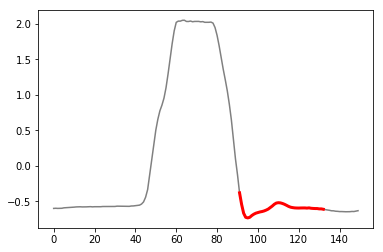

series id: 13, start_pos: 8, length: 36, info_gain: 0.7205429622978472


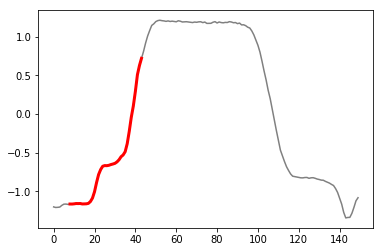

series id: 22, start_pos: 21, length: 22, info_gain: 0.674445792128476


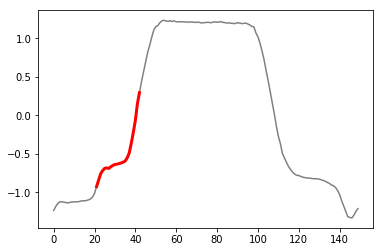

series id: 22, start_pos: 105, length: 45, info_gain: 0.674445792128476


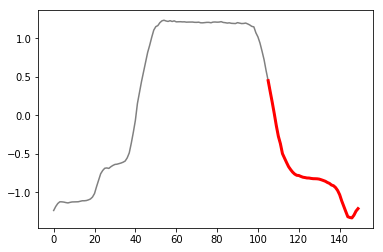

series id: 30, start_pos: 27, length: 24, info_gain: 0.674445792128476


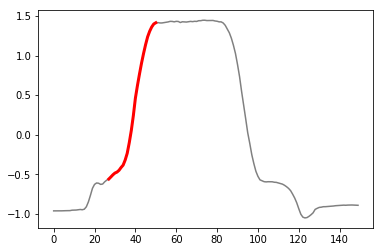

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

# for each extracted shapelet (in descending order of quality/information gain)
for s in st.shapelets[0:5]:

    # summary info about the shapelet 
    print(s)
    
    # plot the series that the shapelet was extracted from 
    plt.plot(
        train_x.iloc[s.series_id,0],
        'gray'
    )
    
    # overlay the shapelet onto the full series
    plt.plot(
        list(range(s.start_pos,(s.start_pos+s.length))),
        train_x.iloc[s.series_id,0][s.start_pos:s.start_pos+s.length],
        'r',
        linewidth=3.0
    )

    plt.show()


In [3]:
import time
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.pipeline import Pipeline

# example pipleine with 1 minute time limit
pipeline = Pipeline([
    ('st', ContractedRandomShapeletTransform(time_limit_in_mins=1, initial_num_shapelets_per_case=10, verbose=False)),
    ('rf', RandomForestClassifier()),
])

start = time.time()
pipeline.fit(train_x, train_y)
end_build = time.time()
preds = pipeline.predict(test_x)
end_test = time.time()

print("Results:")
print("Correct:")
correct = sum(preds == test_y)
print("\t"+str(correct)+"/"+str(len(test_y)))
print("\t"+str(correct/len(test_y))+"%")
print("\nTiming:")
print("\tTo build:   "+str(end_build-start)+" secs")
print("\tTo predict: "+str(end_test-end_build)+" secs")

Time to transform: 11.904866933822632


C:\Users\jason\Anaconda3\envs\sktime\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Time to transform: 36.245450019836426
Results:
Correct:
	146/150
	0.9733333333333334%

Timing:
	To build:   71.92735624313354 secs
	To predict: 36.248440742492676 secs
